# Bewerten von Modellen: K-Nearest Neighbors Classifier für Iris Daten
[Video](https://mstream.hm.edu/paella/ui/watch.html?id=cdf8b73f-56a5-4598-9dae-e80bf63bfe8e)

## Verwenden eines Test-Sets

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Lade Iris Daten und erzeuge daraus Feature Matrix sowie Labels Vektor:

In [3]:
iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

**Ziel:** Trainiere ein Modell mit den Iris-Daten, so dass es dann für gegebene Sepal- und Petal-Längen und Breiten die Spezies angeben kann.

Um zu überprüfen, ob das resultierende Modell korrekt klassifiziert, entfernen wir **VOR** dem Training einen Teil des Datensatzes. Dieser kann dann anschließend zum Testen verwendet werden.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, train_size = 0.7)

Wir verwenden nun **NUR** die ``_train`` Daten, um ein Modell zu trainieren.

In [17]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Nun ist das Modell trainiert. Es hat die ``_test`` Daten **NOCH NIE** gesehen; diese sind somit aus Modellsicht neue, unbekannte Daten.

Auf diese Daten wenden wir nun das Modell an:

In [18]:
y_model = model.predict(X_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Bewerten des Modells

Nun vergleichen wir die vom Modell vorhergesagten Daten ``y_model`` mit den korrekten Daten ``y_test``. Die Funktion ``accuracy_score()`` gibt den Anteil der korrekten Klassifizierungen an.

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.9555555555555556

**Vorsicht:** Die hier erhaltene Genauigkeit hängt natürlich von der Wahl des Testsets ab - anderes Testset $\Longrightarrow$ andere Genauigkeit.

Natürlich können wir die Ergebnisse auch direkt betrachten und vergleichen:

In [20]:
y_model

array(['setosa', 'setosa', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'virginica', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [21]:
y_test.head()

36        setosa
17        setosa
138    virginica
3         setosa
132    virginica
Name: species, dtype: object

``y_test`` behält die Indizes der original Iris Daten bei. Das erlaubt es uns, die vom Modell vorhergesagten Daten in die Iris Daten zu integrieren:

Dafür brauchen wir zuerst ein Objekt, welches mit solchen Indizes umgehen kann, eine ``pd.Series``. Diese füllen wir mit den Ergebnissen aus ``y_model`` und indizieren sie mit den Indizes aus ``y_test``.

In [22]:
import pandas as pd

In [23]:
y_model = pd.Series(y_model, index= y_test.index)
y_model

36         setosa
17         setosa
138    versicolor
3          setosa
132     virginica
93     versicolor
91     versicolor
115     virginica
30         setosa
37         setosa
60     versicolor
137     virginica
88     versicolor
31         setosa
82     versicolor
52     versicolor
35         setosa
56     versicolor
145     virginica
147     virginica
105     virginica
110    versicolor
7          setosa
124     virginica
29         setosa
131     virginica
18         setosa
122     virginica
92     versicolor
128     virginica
49         setosa
45         setosa
44         setosa
71     versicolor
6          setosa
94     versicolor
127     virginica
14         setosa
95     versicolor
143     virginica
81     versicolor
64     versicolor
90     versicolor
144     virginica
97     versicolor
dtype: object

Diese um den passenden Index ergänzten ``y_model`` Daten können wir nun dem Iris DataFrame hinzufügen. In ``KN_species`` nicht enthaltene Daten sollen leer bleiben. Wir betrachten nur den Teil des DataFrame, in dem ``KN_species`` Einträge hat.

In [24]:
iris['KN_species'] = y_model
iris = iris.fillna(value = {'KN_species':''})
iris[iris.KN_species!='']

,sepal_length,sepal_width,petal_length,petal_width,species,KN_species,species_tmp
3,4.6,3.1,1.5,0.2,setosa,setosa,setosa
6,4.6,3.4,1.4,0.3,setosa,setosa,setosa
7,5.0,3.4,1.5,0.2,setosa,setosa,setosa
14,5.8,4.0,1.2,0.2,setosa,setosa,setosa
17,5.1,3.5,1.4,0.3,setosa,setosa,setosa
18,5.7,3.8,1.7,0.3,setosa,setosa,setosa
29,4.7,3.2,1.6,0.2,setosa,setosa,setosa
30,4.8,3.1,1.6,0.2,setosa,setosa,setosa
31,5.4,3.4,1.5,0.4,setosa,setosa,setosa
35,5.0,3.2,1.2,0.2,setosa,setosa,setosa


Wir betrachten nur den Teil des DataFrame, in dem ``species`` und ``KN_species`` verschieden sind, d.h. die falsch klassifizierten Samples.

In [25]:
iris.loc[iris.KN_species!=''].loc[iris.KN_species != iris.species]

,sepal_length,sepal_width,petal_length,petal_width,species,KN_species,species_tmp
110,6.5,3.2,5.1,2.0,virginica,versicolor,virginica
138,6.0,3.0,4.8,1.8,virginica,versicolor,virginica


Nun führen wir eine Hilfsvariable ``species_tmp`` ein, welche die einfache grafische Markierung derjenigen Samples ermöglicht, die falsch klassifiziert wurden.

Diese soll bei korrekter Klassifizierung die Spezies angeben, bei falscher Klassifizierung den Wert ``wrong``.

In [26]:
iris.loc[(iris.KN_species!='') & (iris.KN_species!=iris.species), 'species_tmp'] = 'wrong'
iris.loc[(iris.KN_species!='') & (iris.KN_species==iris.species), 'species_tmp'] = iris.species
iris.loc[(iris.KN_species==''), 'species_tmp'] = iris.species

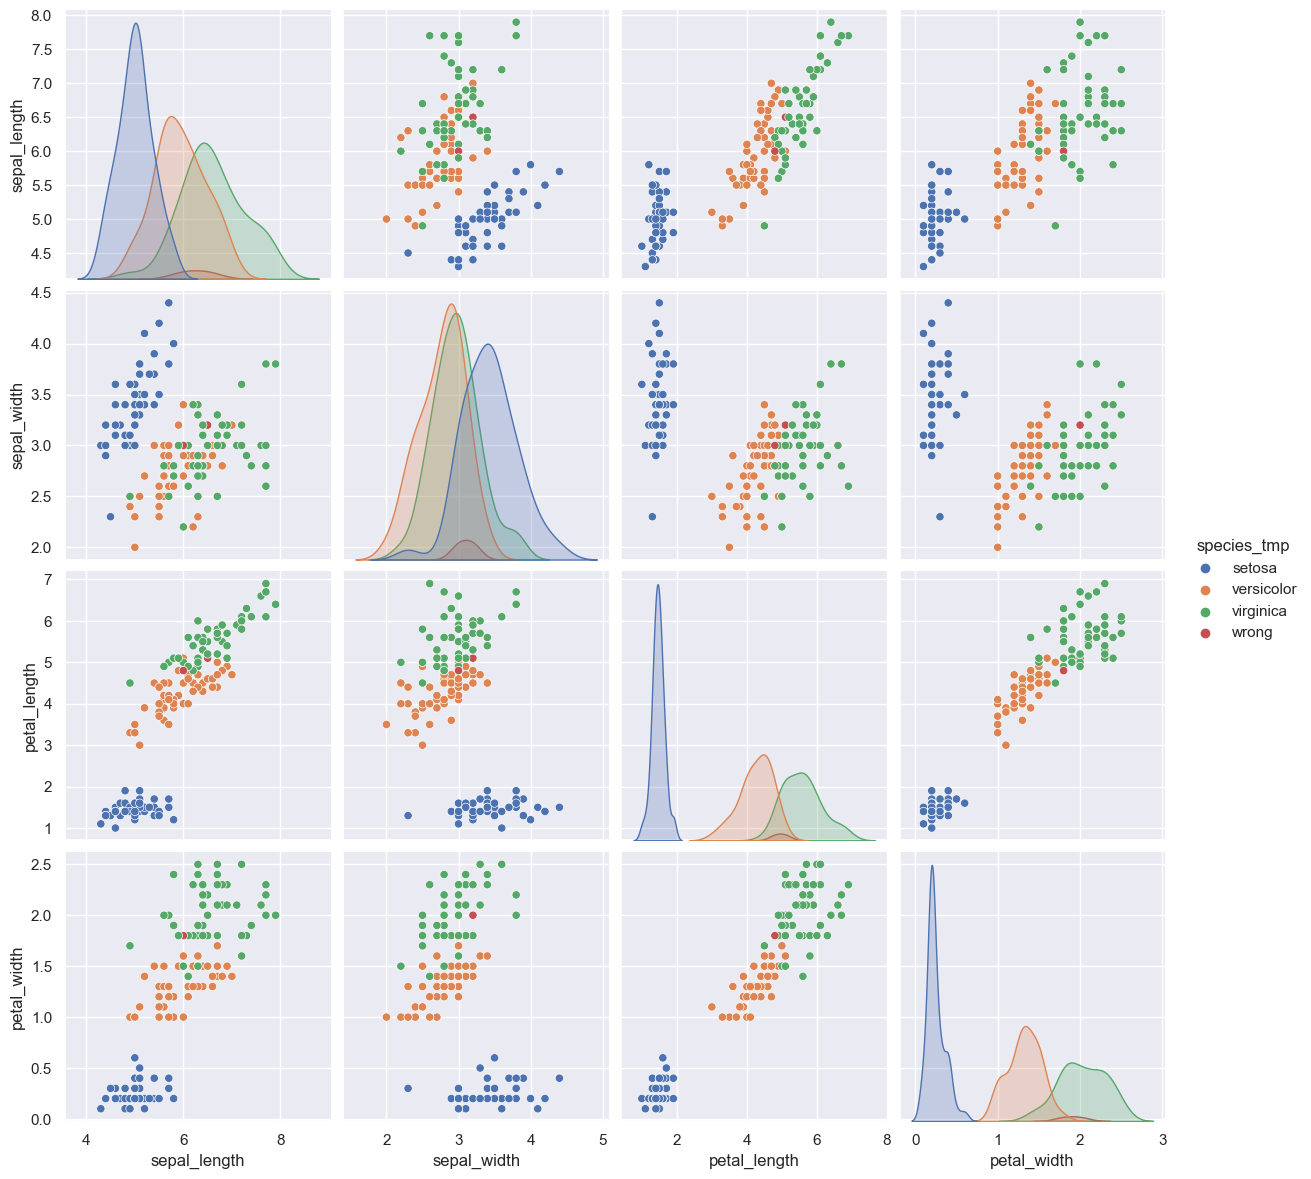

In [27]:
sns.pairplot(iris, hue='species_tmp', height = 3, hue_order=["setosa", "versicolor", "virginica", "wrong"])

## Cross Validation

### Einfachster Fall: Manuelle Aufteilung in zwei Durchgänge
Wir teilen die Trainingsdaten gleichmäßig in zwei Teile auf:

####  Code für die Visualisierung der Aufteilung

In [28]:
def draw_rects(N, ax, textprop={}):
    for i in range(N):
        ax.add_patch(plt.Rectangle((0, i), 5, 0.7, fc='white', edgecolor='black'))
        ax.add_patch(plt.Rectangle((5. * i / N, i), 5. / N, 0.7, fc='lightgray', ec='black'))
        ax.text(5. * (i + 0.5) / N, i + 0.35,
                "validation\nset", ha='center', va='center', **textprop)
        ax.text(0, i + 0.35, "Durchgang {0}".format(N - i),
                ha='right', va='center', rotation=90, **textprop)
    ax.set_xlim(-1, 6)
    ax.set_ylim(-0.2, N + 0.2)

#### Visualisierung der Aufteilung

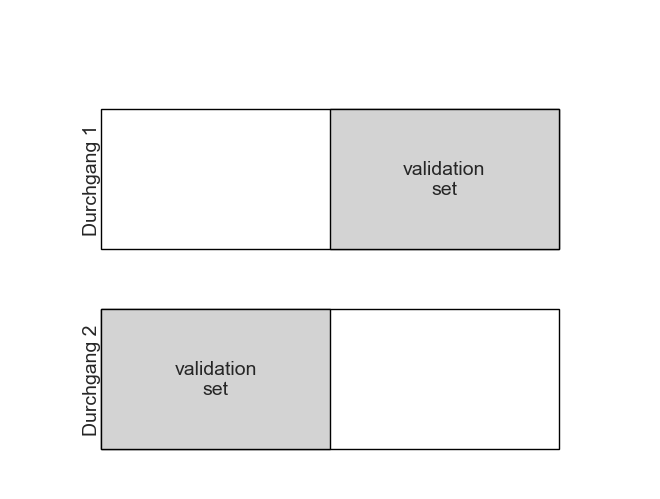

In [29]:
X1, X2, y1, y2 = train_test_split(X_train, y_train, random_state=0, train_size=0.5)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
draw_rects(2, ax, textprop=dict(size=14))

####  Durchgang 1
Das Modell wird nun auf dem Set ``1`` gefittet...

In [30]:
model.fit(X1,y1)

KNeighborsClassifier(n_neighbors=1)

...  und anschließend auf dem Set ``2`` bewertet:

In [36]:
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

1.0

####  Durchgang 2
Das Modell wird nun auf dem Set ``2`` gefittet...

In [37]:
model.fit(X2,y2)

KNeighborsClassifier(n_neighbors=1)

... und anschließend auf dem Set ``1`` bewertet:

In [38]:
y1_model = model.predict(X1)
accuracy_score(y1, y1_model)

0.9423076923076923

### Allgemeiner Fall: Automatische Aufteilung in beliebig viele Folds
Die oben manuell durchgeführte Aufteilung und das anschließende gegenseitige Trainieren und Testen kann automatisiert werden durch ``cross_val_score``. Dabei gibt der Parameter ``cv`` die Anzahl der sog. *Folds* an.

In [39]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train, cv=5)

array([0.95238095, 0.95238095, 1.        , 0.9047619 , 0.9047619 ])

Der extremste Fall ist, dass es genauso viele Folds gibt wie Samples (im Trainingsset). D.h. Für jeden Durchgang wird genau ein Sample zur Validierung zurückgehalten.

In [40]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X_train, y_train, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1.])

Die Score ist jeweils entweder
- 0: d.h. das eine Validierungssample wurde falsch klassifiziert oder
- 1: d.h. das eine Validierungssample wurde korrekt klassifiziert.

Der Mittelwert ist ein gutes Maß dafür, wie gut das Modell ist:

In [41]:
scores.mean()

0.9428571428571428